In [1]:
import sys
sys.path.insert(0, '../../')

In [2]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

from holisticai.explainability import Explainer
from holisticai.metrics.efficacy import regression_efficacy_metrics

In [3]:
dataset = load_diabetes() # load dataset

X = dataset.data # features
y = dataset.target # target 
feature_names = dataset.feature_names # feature names

X = pd.DataFrame(X, columns=feature_names) # convert to dataframe

In [4]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
seed = np.random.seed(42) # set seed for reproducibility
# simple preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed) # train test split

model = GradientBoostingRegressor() # instantiate model
model.fit(X_train, y_train) # fit model

y_pred = model.predict(X_test) # compute predictions

# compute efficacy metrics
regression_efficacy_metrics(y_test, y_pred)

,Value,Reference
Metric,,
RMSE,53.952020,0
MAE,44.638564,0
MAPE,0.399881,0
Max Error,131.736157,0
SMAPE,0.164915,0


# Global Explainability Metrics (based on Permutation Feature Importance)

In [5]:
# permutation feature importance
permutation_explainer = Explainer(based_on='feature_importance',
                      strategy_type='permutation',
                      model_type='regression',
                      model = model, 
                      x = X, 
                      y = y)

In [6]:
permutation_explainer.metrics()

,Value,Reference
Metric,,
Explainability Ease,0.750000,1
Fourth Fifths,0.400000,0
Position Parity,0.306776,1
Rank Alignment,0.752946,1
Spread Divergence,0.460785,-
Spread Ratio,0.799884,0


The accumulated feature importance for 4 features is equal 0.7748 < 0.8.


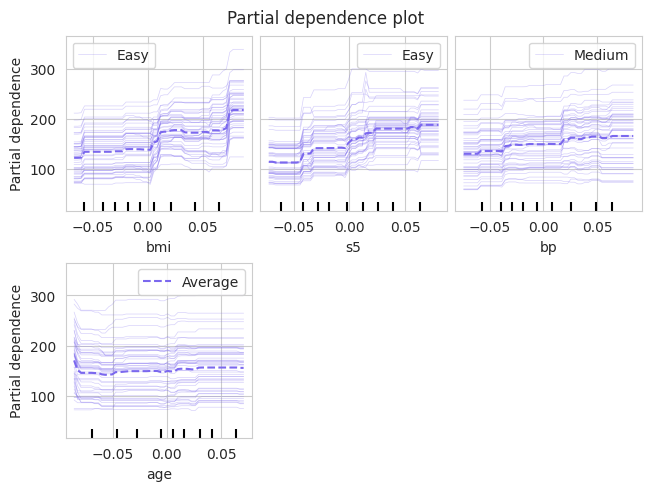

In [7]:
permutation_explainer.partial_dependence_plot(kind='both')

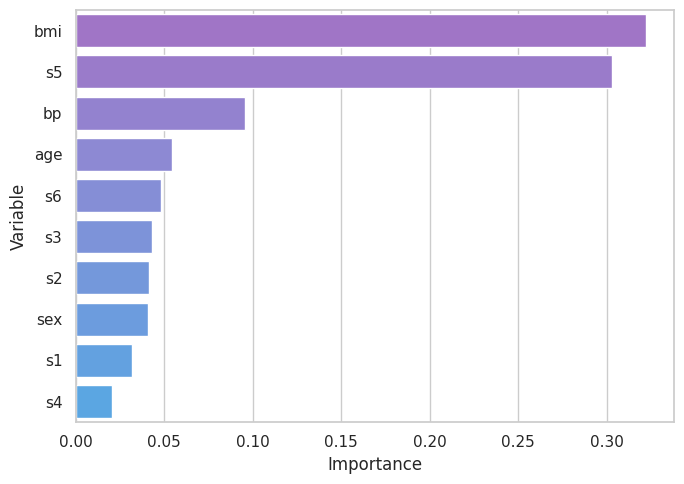

In [8]:
permutation_explainer.bar_plot(max_display=10)

In [9]:
permutation_explainer.feature_importance_table(sorted_by='Global', top_n=5)

,Global Importance,[Q0-Q1] Importance,[Q1-Q2] Importance,[Q2-Q3] Importance,[Q3-Q4] Importance
Variable,,,,,
bmi,0.321886,0.122267,0.208239,0.090481,0.280007
s5,0.302777,0.239292,0.164905,0.230507,0.130517
bp,0.095825,nan,nan,nan,0.127500
age,0.054271,0.153966,0.135719,0.185101,0.088731
sex,nan,0.102726,nan,0.115401,nan


# Global Explainability metrics (based on Surrogate Model)

In [10]:
# surrogate feature importance
surrogate_explainer = Explainer(based_on='feature_importance',
                      strategy_type='surrogate',
                      model_type='regression',
                      model = model, 
                      x = X, 
                      y = y)

In [11]:
surrogate_explainer.metrics()

,Value,Reference
Metric,,
Explainability Ease,0.900000,1
Fourth Fifths,0.100000,0
Spread Divergence,1.533691,-
Spread Ratio,0.333927,0
Surrogacy Efficacy,0.083324,0


The accumulated feature importance for 1 features is equal 0.6825 < 0.8.


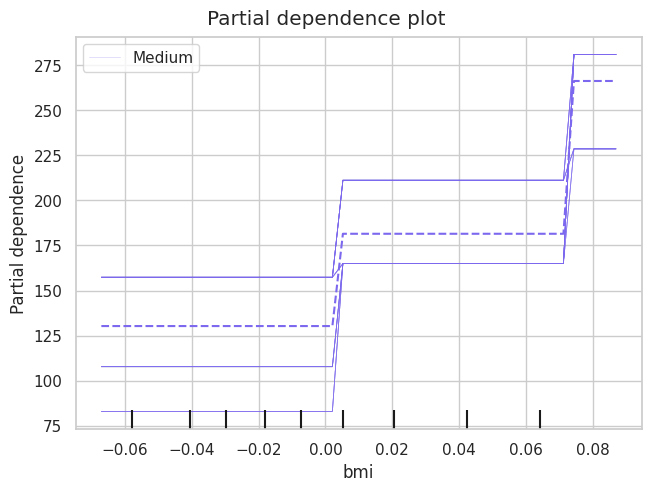

In [12]:
surrogate_explainer.partial_dependence_plot(kind="both")

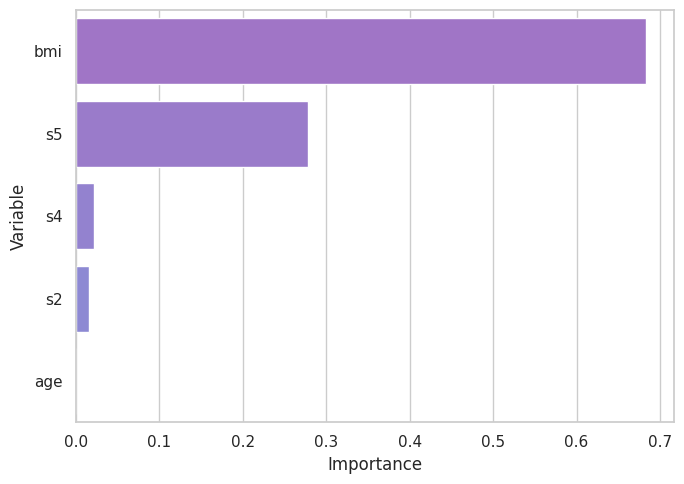

In [13]:
surrogate_explainer.bar_plot(max_display=5)

In [14]:
surrogate_explainer.feature_importance_table(sorted_by='Global', top_n=10)

,Global Importance
Variable,
bmi,0.682537


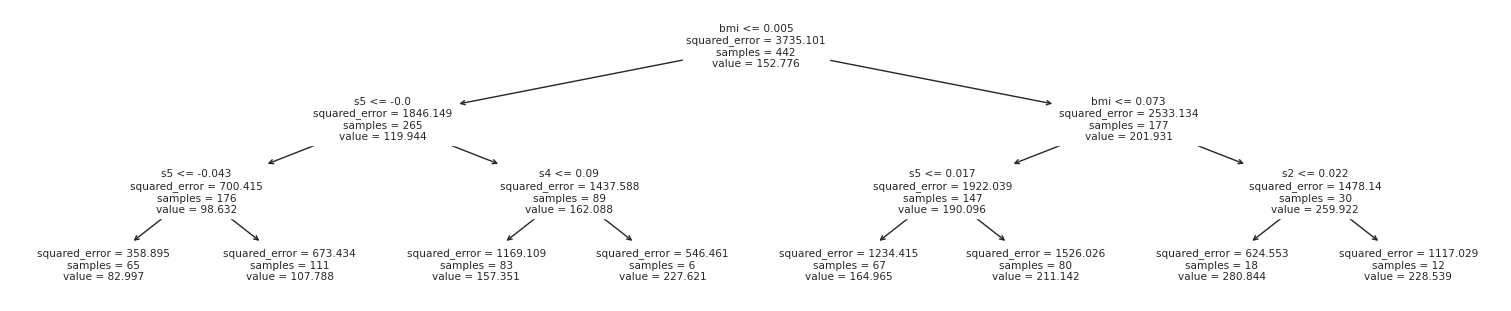

In [15]:
_,ax = plt.subplots(figsize=(15,3))
_ = surrogate_explainer.tree_visualization('sklearn', ax=ax)

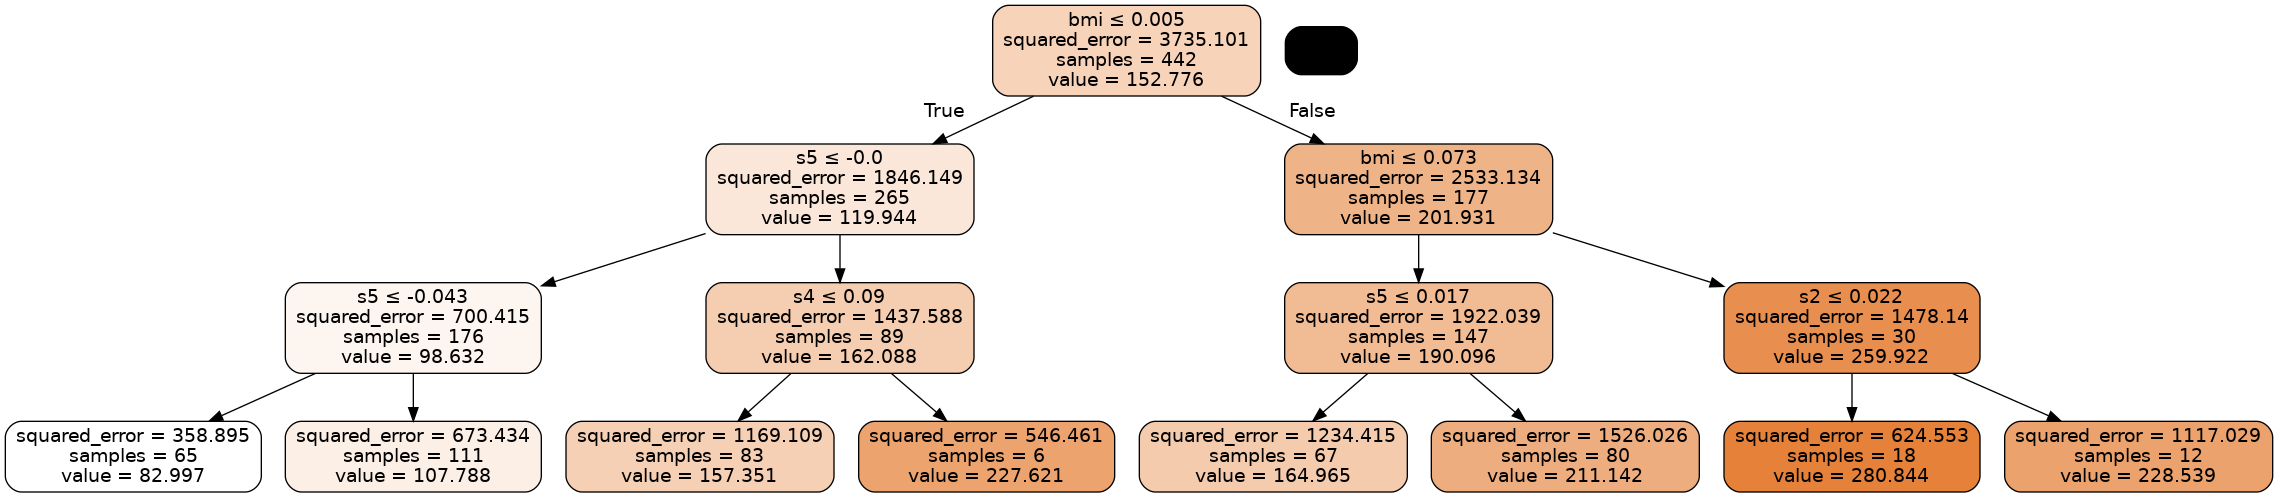

In [16]:
surrogate_explainer.tree_visualization('pydotplus')

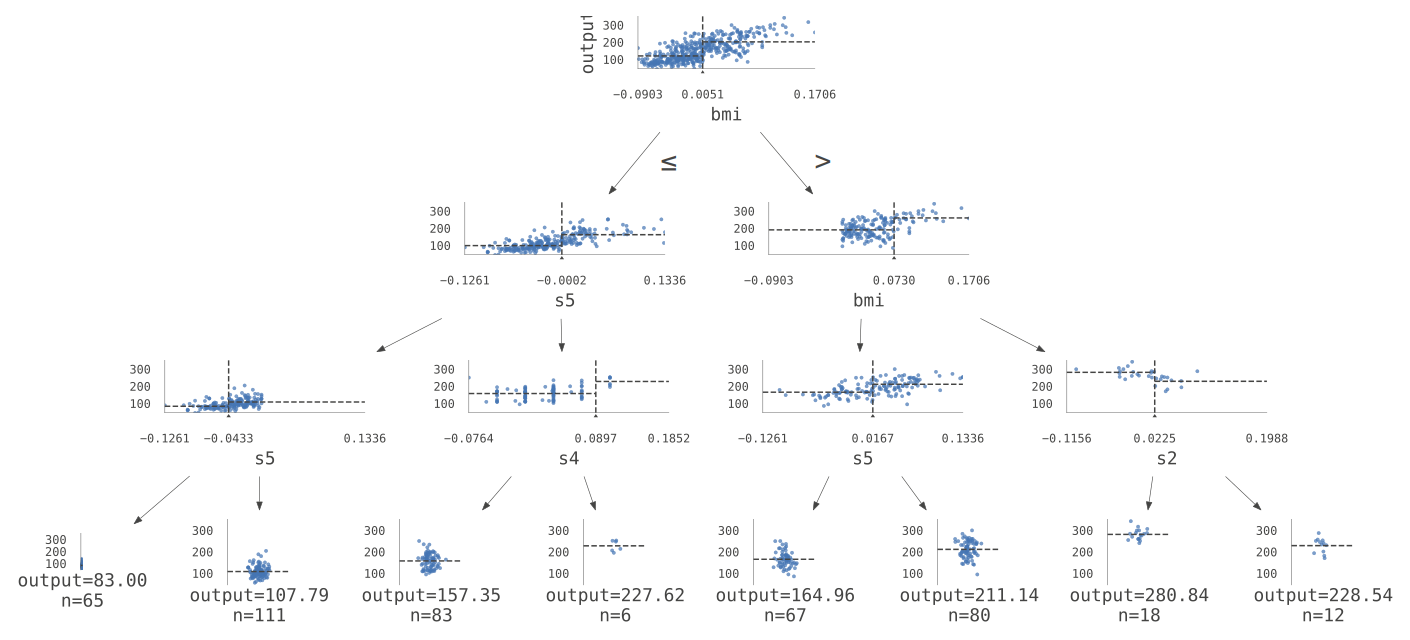

In [17]:
vis = surrogate_explainer.tree_visualization('dtreeviz', scale=2)
vis

# Local Explainability Metrics (based on Lime)

In [18]:
# lime feature importance
lime_explainer = Explainer(based_on='feature_importance',
                      strategy_type='lime',
                      model_type='regression',
                      model = model, 
                      x = X, 
                      y = y)

In [19]:
lime_explainer.metrics()

,Value,Reference
Metric,,
Data Stability,0.039340,0
Feature Stability,0.005578,0


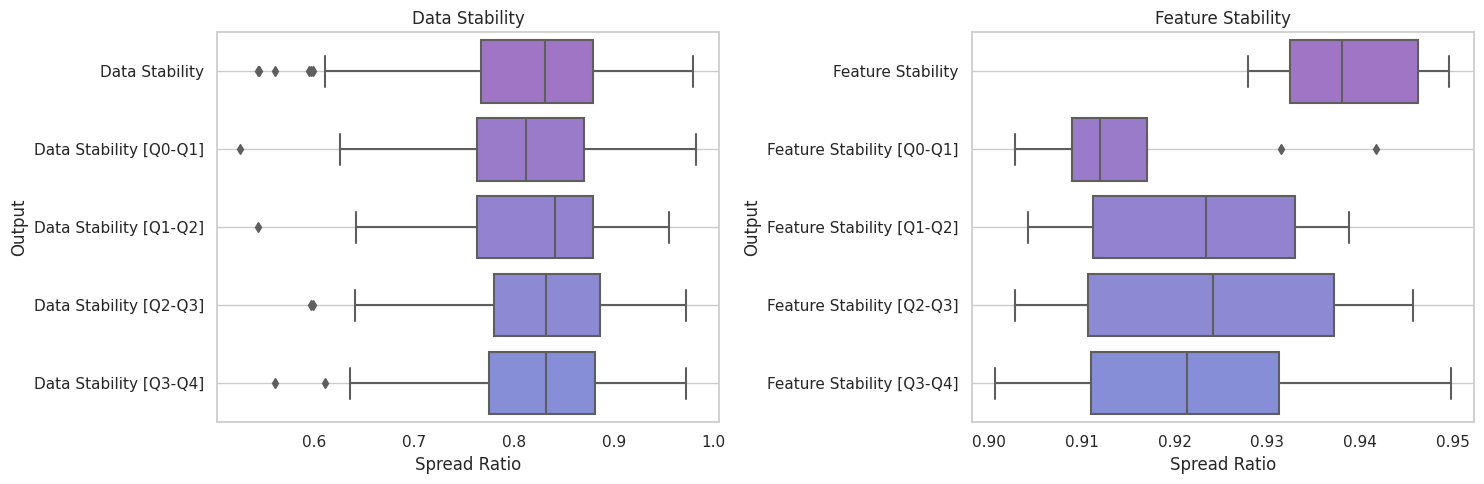

In [20]:
lime_explainer.show_importance_stability()

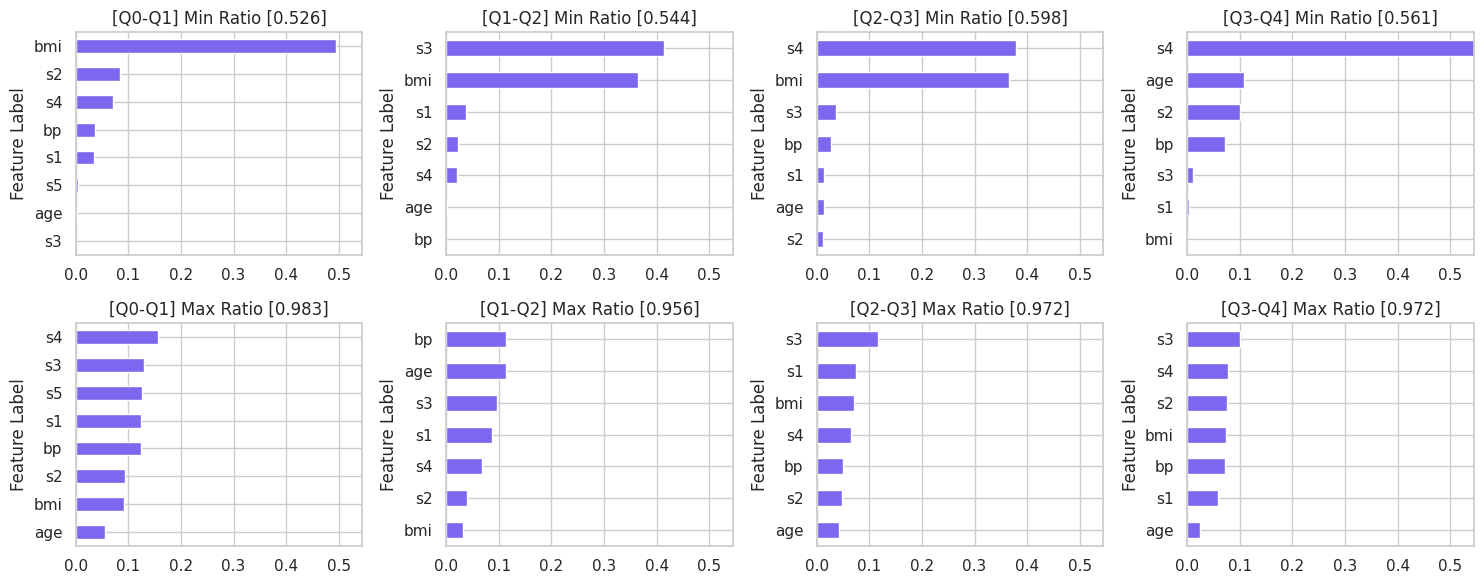

In [21]:
lime_explainer.show_data_stability_boundaries(top_n=10, figsize=(15,6))

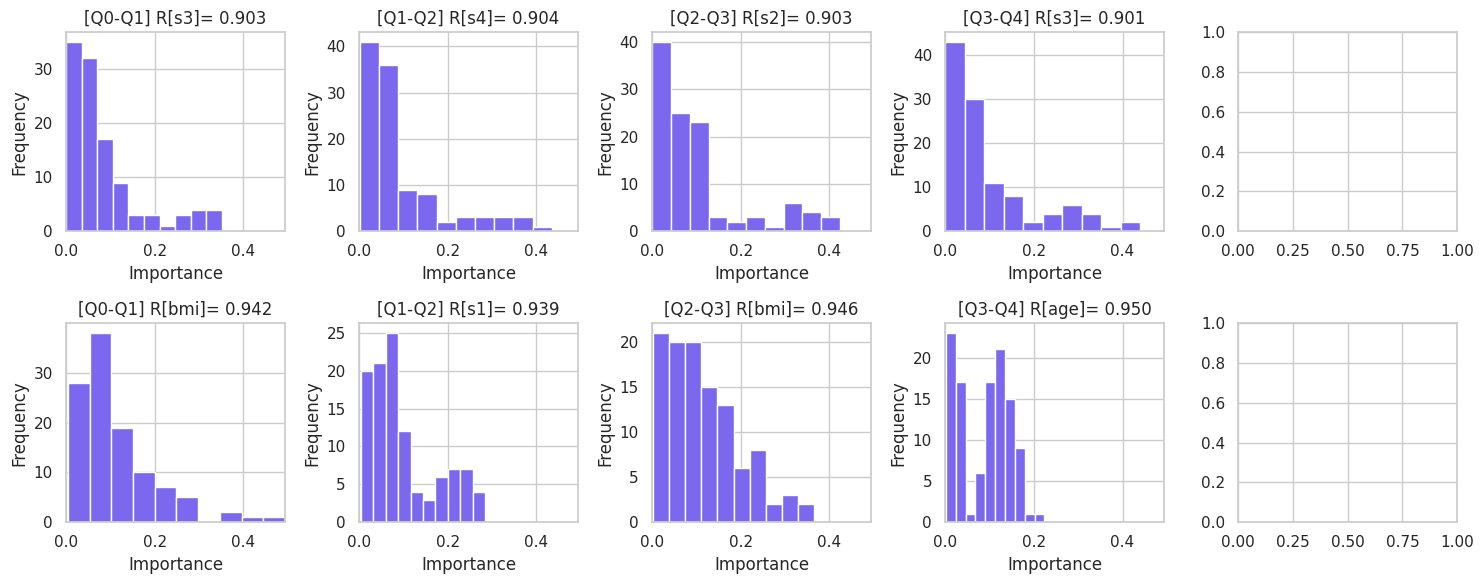

In [22]:
lime_explainer.show_features_stability_boundaries(figsize=(15,6))

In [23]:
# lime feature importance
shap_explainer = Explainer(based_on='feature_importance',
                      strategy_type='shap',
                      model_type='regression',
                      model = model, 
                      x = X, 
                      y = y)

Exact explainer: 442it [01:46,  3.92it/s]                         


In [24]:
shap_explainer.metrics()

,Value,Reference
Metric,,
Data Stability,0.049946,0
Feature Stability,0.012055,0


In [25]:
shap_explainer.metrics(detailed=True)

,Value,Reference
Metric,,
Data Stability,0.049946,0
Data Stability [Q0-Q1],0.044680,0
Data Stability [Q1-Q2],0.041266,0
Data Stability [Q2-Q3],0.044481,0
Data Stability [Q3-Q4],0.061469,0
Feature Stability,0.012055,0
Feature Stability [Q0-Q1],0.015243,0
Feature Stability [Q1-Q2],0.012661,0
Feature Stability [Q2-Q3],0.014431,0


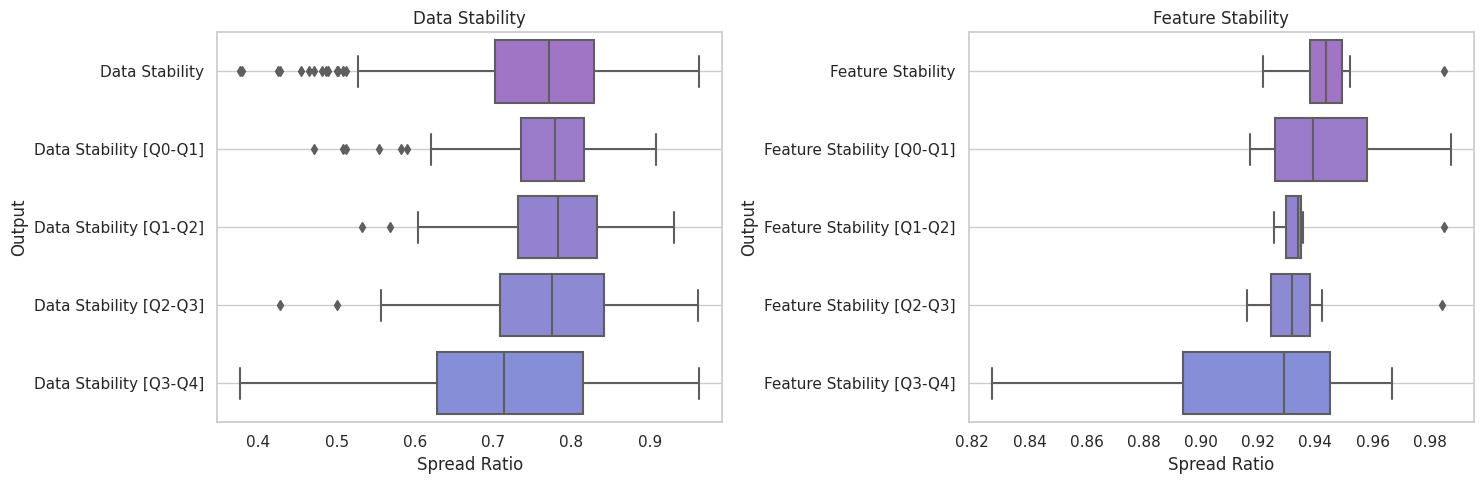

In [26]:
shap_explainer.show_importance_stability()

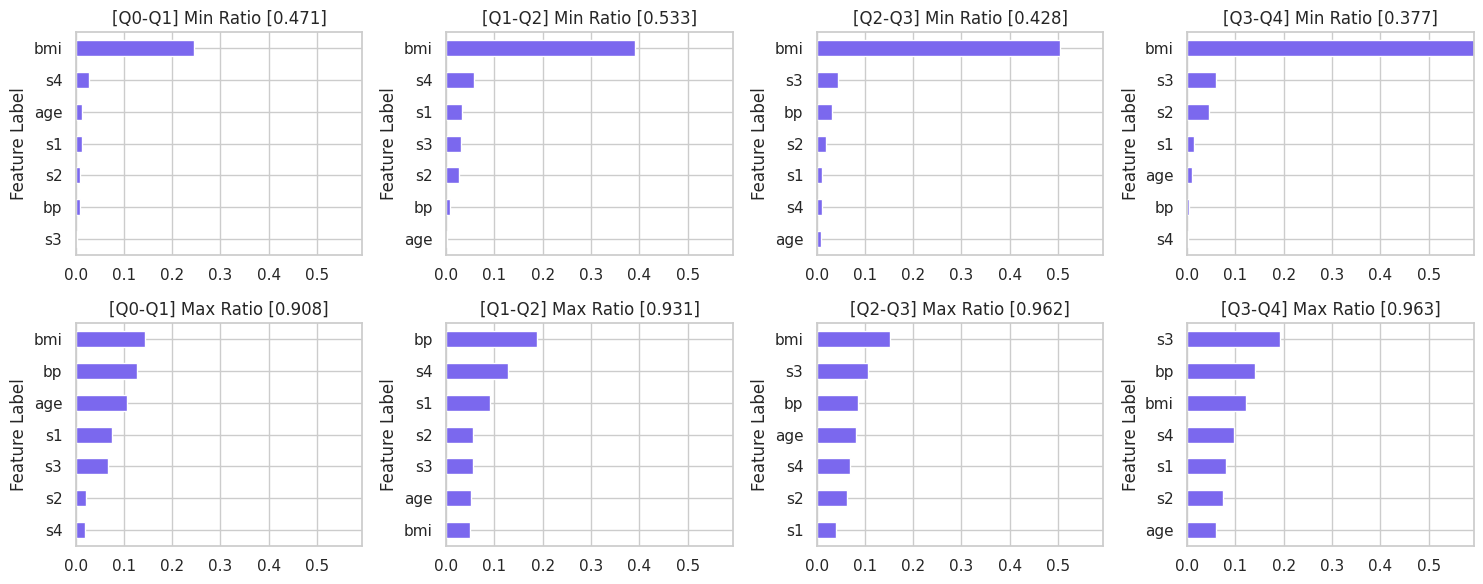

In [27]:
shap_explainer.show_data_stability_boundaries(top_n=10, figsize=(15,6))

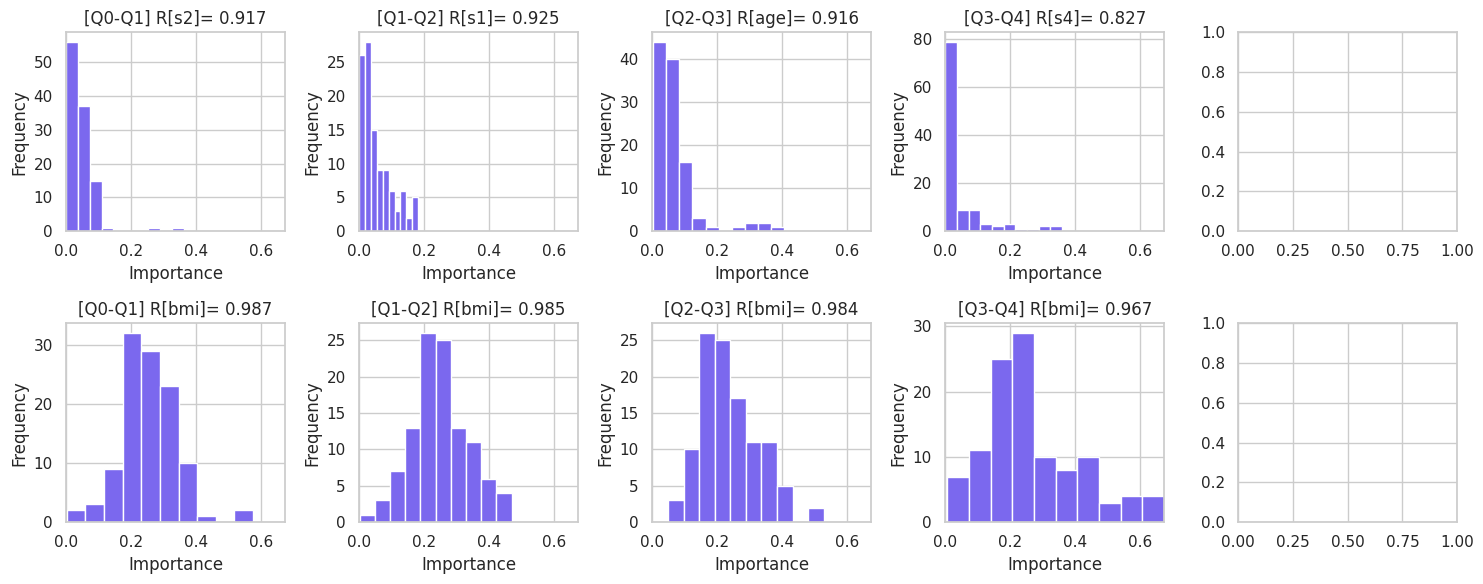

In [28]:
shap_explainer.show_features_stability_boundaries(figsize=(15,6))